In [1]:
# 라이브러리 불러오기
import seaborn as sns
import pandas as pd

In [3]:
train = pd.read_csv('./seaborn_practice/train.csv')

In [4]:
x_data = train['residual sugar']
y_data = train['density']

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

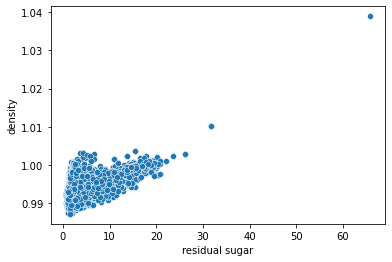

In [5]:
sns.scatterplot(x = x_data, y = y_data )

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
train.drop('type',inplace = True,axis=1) # 변주형 변수 제거

In [8]:
# 피처마다의 VIF 계수를 출력합니다.


# 결과값을 저장할 VIF라는 이름의 리스트 생성
vif = []

# values atribution(속성) 이용해 train 데이터의 값만 추출
train_val = train.values

#  variance_inflation_factor 함수에 인자로 train_val (train 데이터의 값)과 인덱스 번호 지정  
# for문 이용
for i in range(len(train.columns)):
  vif.append(variance_inflation_factor(train_val, i))


vif

[4.007175138928272,
 64.10743200252591,
 59.14918709853955,
 9.610687118796196,
 9.27344388429465,
 3.616414435307183,
 5.7159808829777585,
 8.420882621285777,
 14.833789006276412,
 945.3239910887048,
 583.5011867251005,
 18.535849630077276,
 131.12669981396292]

In [9]:
# 데이터 프레임 형식으로 바꿔 가독성 높이기! (보너스 문제)

vif_dataframe = pd.DataFrame()
vif_dataframe['columns'] = train.columns
vif_dataframe['VIF'] = vif
vif_dataframe

,columns,VIF
0,index,4.007175
1,quality,64.107432
2,fixed acidity,59.149187
3,volatile acidity,9.610687
4,citric acid,9.273444
5,residual sugar,3.616414
6,chlorides,5.715981
7,free sulfur dioxide,8.420883
8,total sulfur dioxide,14.833789
9,density,945.323991


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# MinMaxScaler를 통해 변수 변환 

# MinMaxScaler를 "scaler"라는 변수에 지정해 봅시다.

scaler = MinMaxScaler()

# "scaler"를 train 으로 학습시켜주세요

scaler.fit(train)

# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.

train_scale = scaler.transform(train)

In [13]:
train_scale

array([[0.00000000e+00, 3.33333333e-01, 1.48760331e-01, ...,
        5.51181102e-01, 1.23595506e-01, 3.18840580e-01],
       [1.81950509e-04, 3.33333333e-01, 4.13223140e-01, ...,
        3.54330709e-01, 2.07865169e-01, 2.17391304e-01],
       [3.63901019e-04, 3.33333333e-01, 3.38842975e-01, ...,
        2.44094488e-01, 1.68539326e-01, 4.20289855e-01],
       ...,
       [9.99636099e-01, 6.66666667e-01, 3.30578512e-01, ...,
        2.59842520e-01, 2.80898876e-01, 4.78260870e-01],
       [9.99818049e-01, 3.33333333e-01, 2.31404959e-01, ...,
        3.07086614e-01, 1.06741573e-01, 3.62318841e-01],
       [1.00000000e+00, 5.00000000e-01, 2.64462810e-01, ...,
        3.07086614e-01, 7.86516854e-02, 2.46376812e-01]])

In [14]:
# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df =  pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns 
vif

,VIF Factor,features
0,3.848628,index
1,14.491571,quality
2,37.792930,fixed acidity
3,6.978592,volatile acidity
4,9.094026,citric acid
5,14.246815,residual sugar
6,4.590877,chlorides
7,8.009056,free sulfur dioxide
8,11.227393,total sulfur dioxide
9,106.041429,density
